# Task
Perform a classification task on the Iris dataset by loading the data, exploring it with visualizations, building and evaluating various classification models (Logistic Regression, Random Forest, SVM), and summarizing the results to identify the best-performing model.

## Load Iris Dataset

### Subtask:
Load the Iris dataset into a pandas DataFrame, preparing it for analysis.


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the features
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species names) to the DataFrame
df_iris['species'] = iris.target_names[iris.target]

print("Iris dataset loaded successfully. Displaying the first 5 rows:")
print(df_iris.head())

Iris dataset loaded successfully. Displaying the first 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

print("DataFrame Information:")
df_iris.info()

print("\nDescriptive Statistics:")
print(df_iris.describe())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%  

**Reasoning**:
To further explore the relationships between features and visualize the data distribution for each species, I will generate a pair plot and individual box plots as specified in the instructions. This will provide a comprehensive visual overview of the dataset characteristics.



Generating Pair Plot...


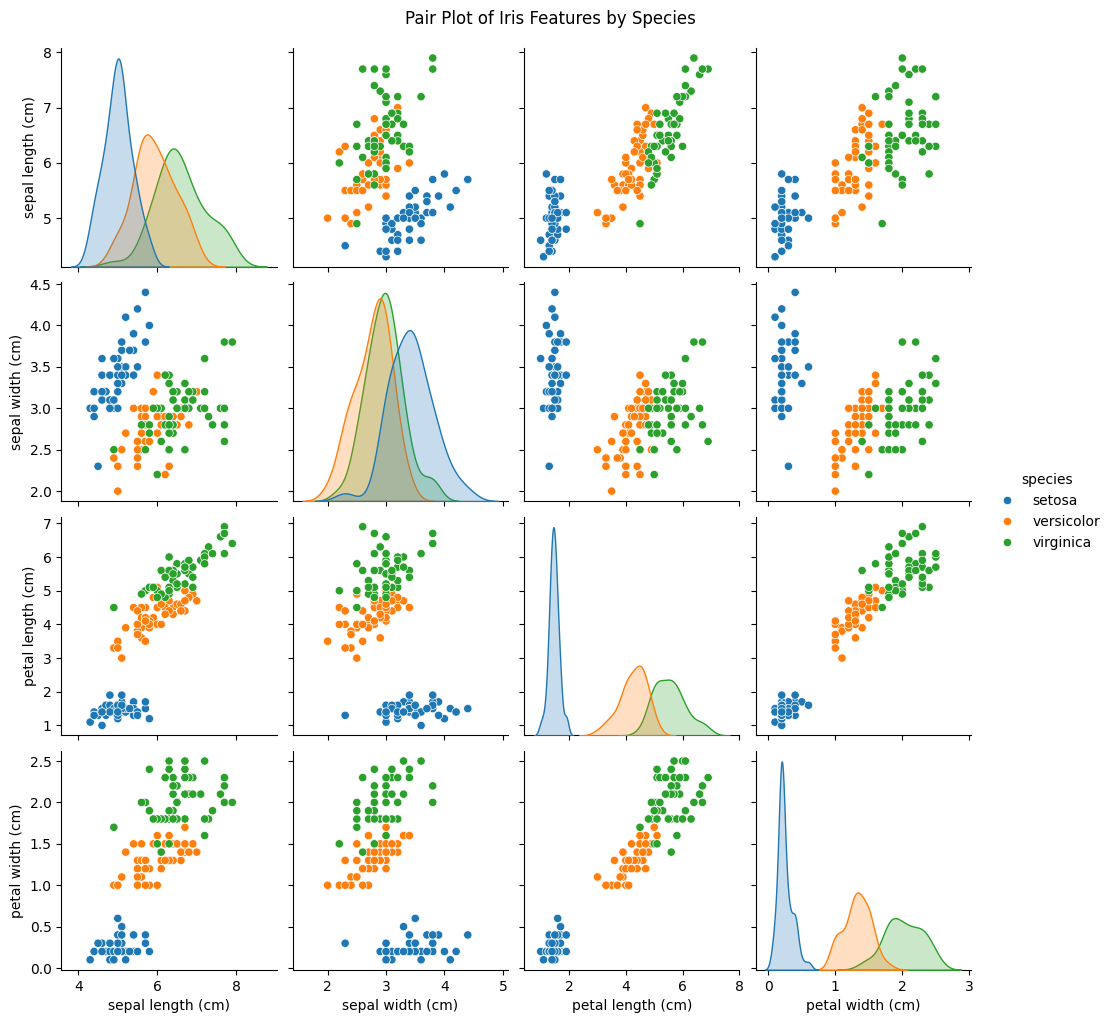

Generating Box Plots for each feature by Species...


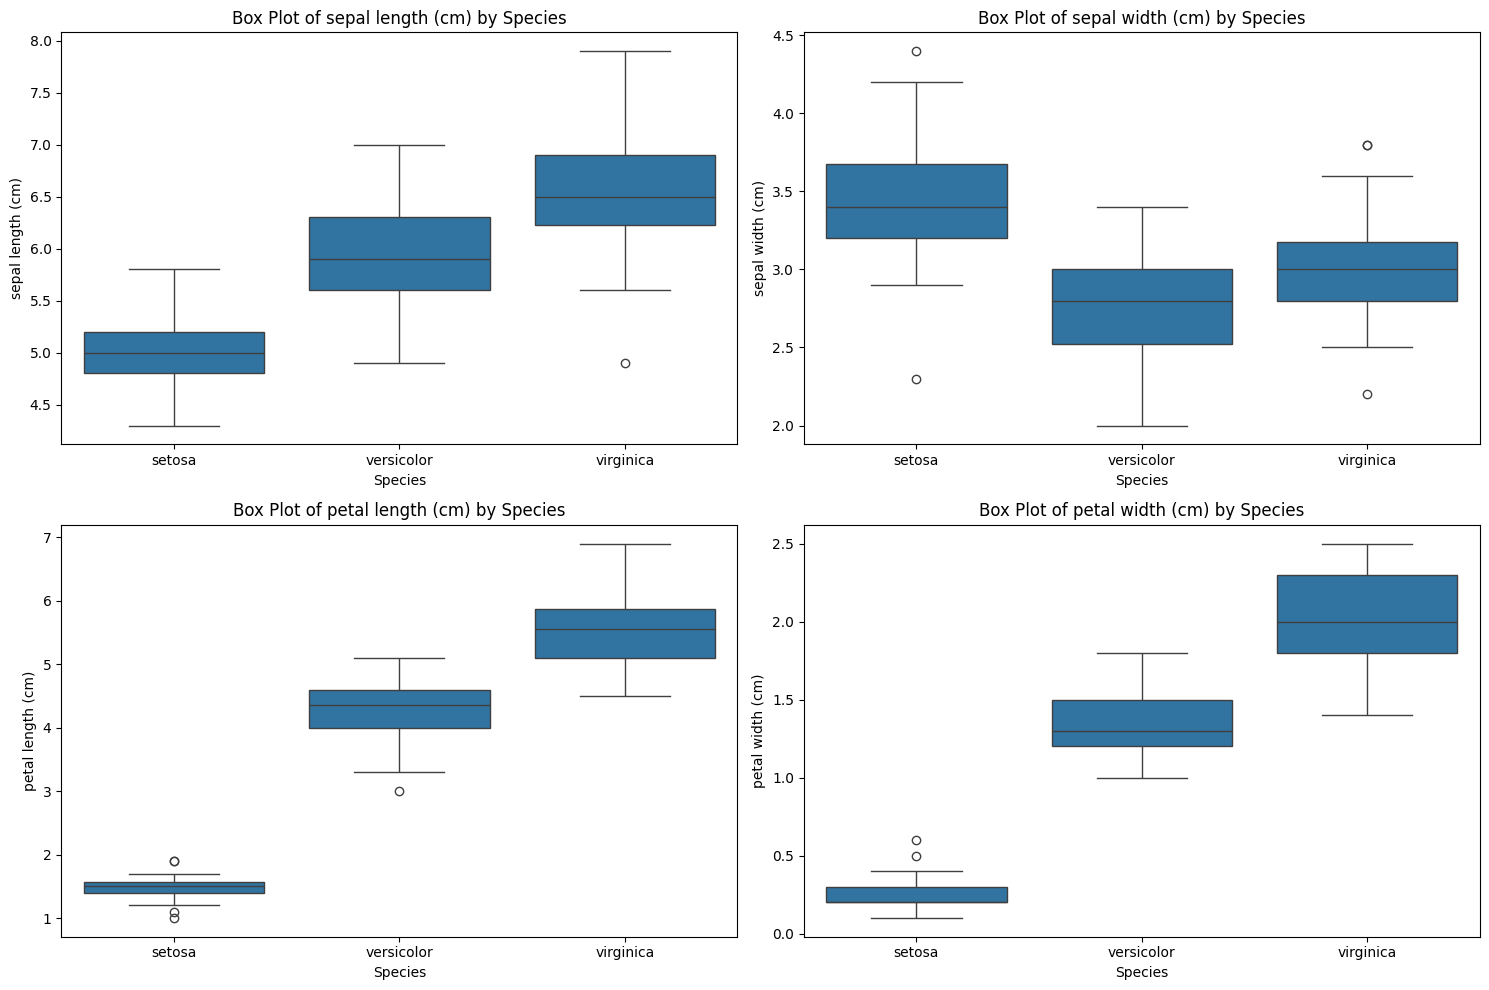

In [3]:
print("Generating Pair Plot...")
sns.pairplot(df_iris, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) # Adjust suptitle position
plt.show()

print("Generating Box Plots for each feature by Species...")

# Get numerical columns excluding 'species'
numerical_cols = df_iris.select_dtypes(include=['float64']).columns

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.boxplot(x='species', y=column, data=df_iris)
    plt.title(f'Box Plot of {column} by Species')
    plt.xlabel('Species')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


## Build Classification Models

### Subtask:
Implement and train various classification models, including Logistic Regression, Random Forest, and Support Vector Machine (SVM), on the Iris dataset.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Separate features (X) and target (y)
X = df_iris.drop('species', axis=1)
y = df_iris['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize models
log_reg_model = LogisticRegression(max_iter=200, random_state=42) # Increased max_iter for convergence
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

print("\nClassification models initialized.")

# Train models
print("Training Logistic Regression model...")
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

print("Training Random Forest Classifier model...")
rf_model.fit(X_train, y_train)
print("Random Forest Classifier model trained.")

print("Training Support Vector Machine (SVM) model...")
svm_model.fit(X_train, y_train)
print("Support Vector Machine (SVM) model trained.")

Data split into training and testing sets.
X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)

Classification models initialized.
Training Logistic Regression model...
Logistic Regression model trained.
Training Random Forest Classifier model...
Random Forest Classifier model trained.
Training Support Vector Machine (SVM) model...
Support Vector Machine (SVM) model trained.


## Evaluate Model Performance

### Subtask:
Evaluate the performance of the trained classification models using metrics such as test accuracy (Test & Score) and Confusion Matrix.


**Reasoning**:
To evaluate the performance of each trained model, I will first import the necessary metrics from `sklearn.metrics`, then use each model to make predictions on the test set, and finally calculate and print both the accuracy score and the confusion matrix for each model.



In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate Logistic Regression Model
print("\n--- Logistic Regression Model Evaluation ---")
y_pred_log_reg = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Evaluate Random Forest Model
print("\n--- Random Forest Model Evaluation ---")
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Evaluate SVM Model
print("\n--- Support Vector Machine (SVM) Model Evaluation ---")
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


--- Logistic Regression Model Evaluation ---
Logistic Regression Accuracy: 1.0000
Logistic Regression Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

--- Random Forest Model Evaluation ---
Random Forest Accuracy: 1.0000
Random Forest Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

--- Support Vector Machine (SVM) Model Evaluation ---
SVM Accuracy: 1.0000
SVM Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Load Housing Dataset

### Subtask:
Load the housing dataset into a pandas DataFrame, preparing it for analysis.


**Reasoning**:
To begin loading the housing dataset, I will import the necessary libraries, load the dataset, create a DataFrame from its features, add the target variable, and then display the first few rows and information to verify the loading process as per the instructions.



In [7]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing = fetch_california_housing()

# Create a DataFrame from the features
df_housing = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# Add the target variable (median house value) to the DataFrame
df_housing['MedHouseVal'] = housing.target

print("California Housing dataset loaded successfully. Displaying the first 5 rows:")
print(df_housing.head())

print("\nDataFrame Information:")
df_housing.info()

California Housing dataset loaded successfully. Displaying the first 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float6

## Clean Data

### Subtask:
Handle missing values, outliers, and perform data scaling to prepare the dataset for modeling.


In [8]:
print("Missing values in df_housing:")
print(df_housing.isnull().sum())

Missing values in df_housing:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Generating Box Plots for Outlier Detection...


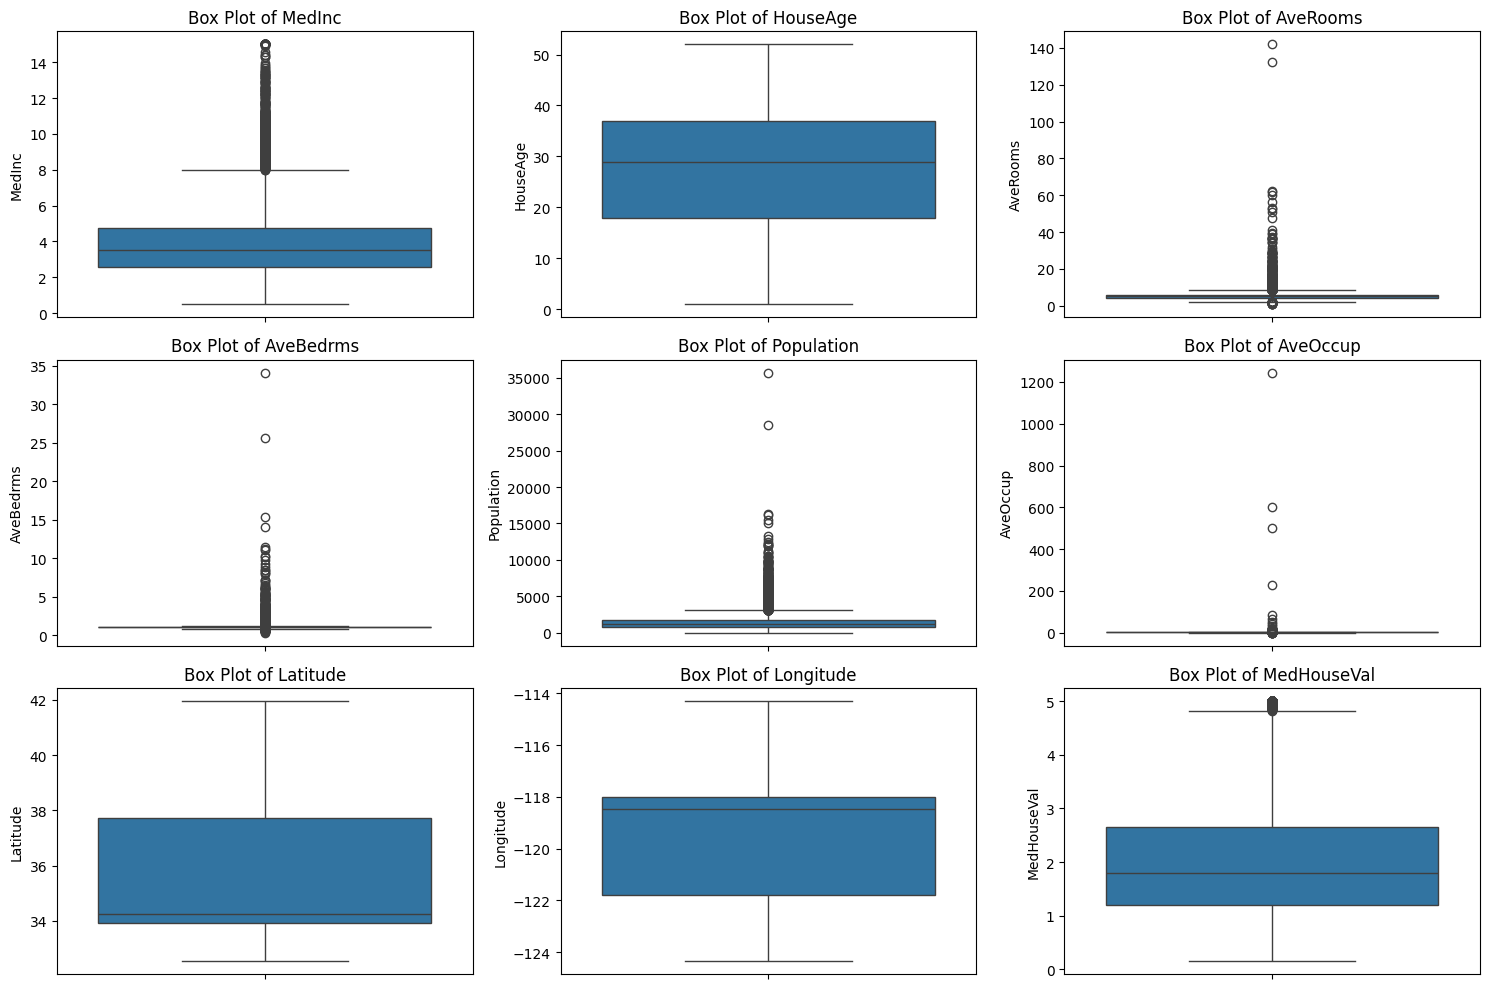

Box plots generated for numerical features.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Generating Box Plots for Outlier Detection...")

# Get numerical columns for outlier detection (all columns except the target are numerical here)
numerical_cols = df_housing.select_dtypes(include=['float64']).columns.tolist()
# Exclude 'MedHouseVal' if we are only scaling features, but for outlier detection it can be included initially

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Arrange plots in a 3x3 grid
    sns.boxplot(y=df_housing[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

print("Box plots generated for numerical features.")

In [10]:
import numpy as np

print("Handling outliers using IQR method...")

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply outlier capping to numerical columns except 'MedHouseVal' if it's the target
# For the purpose of data preparation, we will cap all numerical features.
for col in numerical_cols:
    df_housing = cap_outliers_iqr(df_housing, col)

print("Outliers handled for numerical features. Displaying descriptive statistics after capping:")
print(df_housing.describe())

Handling outliers using IQR method...
Outliers handled for numerical features. Displaying descriptive statistics after capping:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.801010     28.639486      5.304740      1.057958   1336.959012   
std        1.657658     12.585558      1.246177      0.080448    765.550830   
min        0.499900      1.000000      2.023219      0.865909      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max        8.013025     52.000000      8.469878      1.239697   3132.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       2.899647     35.63186

In [11]:
from sklearn.preprocessing import StandardScaler

print("Applying StandardScaler to numerical features...")

# Initialize the StandardScaler
scaler = StandardScaler()

# Separate features (X_housing) from the target (y_housing) if 'MedHouseVal' is the target
# If 'MedHouseVal' is also to be scaled as a feature, keep it in X_housing

X_housing = df_housing.drop('MedHouseVal', axis=1)
y_housing = df_housing['MedHouseVal']

# Fit and transform the numerical features
X_scaled = scaler.fit_transform(X_housing)

# Create a DataFrame with the scaled features
df_housing_scaled = pd.DataFrame(X_scaled, columns=X_housing.columns)

# Add the target variable back to the scaled DataFrame
df_housing_scaled['MedHouseVal'] = y_housing.values

df_housing = df_housing_scaled

print("Numerical features scaled successfully. Displaying the first 5 rows of the scaled DataFrame:")
print(df_housing.head())
print("\nDescriptive statistics of the scaled DataFrame:")
print(df_housing.describe())

Applying StandardScaler to numerical features...
Numerical features scaled successfully. Displaying the first 5 rows of the scaled DataFrame:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.541006  0.982143  1.347665  -0.424488   -1.325821 -0.497871  1.052548   
1  2.541006 -0.607019  0.749027  -1.070004    1.389936 -1.142781  1.043185   
2  2.085156  1.856182  2.394098   0.192534   -1.098528 -0.140910  1.038503   
3  1.111288  1.856182  0.411358   0.187723   -1.017539 -0.508882  1.038503   
4  0.027262  1.856182  0.784108   0.287439   -1.008395 -1.039145  1.038503   

   Longitude  MedHouseVal  
0  -1.327835        4.526  
1  -1.322844        3.585  
2  -1.332827        3.521  
3  -1.337818        3.413  
4  -1.337818        3.422  

Descriptive statistics of the scaled DataFrame:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean  -7.71131

In [12]:
print("Checking for categorical columns in df_housing...")
categorical_cols = df_housing.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    print(f"Categorical columns found: {categorical_cols.tolist()}")
    print("Applying one-hot encoding...")
    df_housing = pd.get_dummies(df_housing, columns=categorical_cols, drop_first=True)
    print("One-hot encoding applied. Displaying first 5 rows of transformed DataFrame:")
    print(df_housing.head())
else:
    print("No categorical columns found. Numerical features have already been scaled.")
    print("No further transformations needed for this step.")


Checking for categorical columns in df_housing...
No categorical columns found. Numerical features have already been scaled.
No further transformations needed for this step.


## Build Regression Models

### Subtask:
Construct and train regression models, including Linear Regression and Decision Trees, on the preprocessed housing data.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

print("Separating features and target from df_housing...")
# Separate features (X_housing) and target (y_housing)
X_housing = df_housing.drop('MedHouseVal', axis=1)
y_housing = df_housing['MedHouseVal']

print("Splitting data into training and testing sets...")
# Split the dataset into training and testing sets
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

print("Data split successfully.")
print(f"X_train_housing shape: {X_train_housing.shape}")
print(f"X_test_housing shape: {X_test_housing.shape}")
print(f"y_train_housing shape: {y_train_housing.shape}")
print(f"y_test_housing shape: {y_test_housing.shape}")

print("Initializing regression models...")
# Initialize models
linear_reg_model = LinearRegression()
dt_reg_model = DecisionTreeRegressor(random_state=42)

print("Regression models initialized.")

# Train models
print("Training Linear Regression model...")
linear_reg_model.fit(X_train_housing, y_train_housing)
print("Linear Regression model trained.")

print("Training Decision Tree Regressor model...")
dt_reg_model.fit(X_train_housing, y_train_housing)
print("Decision Tree Regressor model trained.")

Separating features and target from df_housing...
Splitting data into training and testing sets...
Data split successfully.
X_train_housing shape: (14448, 8)
X_test_housing shape: (6192, 8)
y_train_housing shape: (14448,)
y_test_housing shape: (6192,)
Initializing regression models...
Regression models initialized.
Training Linear Regression model...
Linear Regression model trained.
Training Decision Tree Regressor model...
Decision Tree Regressor model trained.


## Evaluate Model Performance and Visualize Results

### Subtask:
Evaluate the performance of the trained regression models and visualize the results using Scatter Plots (Actual vs. Predicted) to compare model accuracy.



--- Linear Regression Model Evaluation ---
Linear Regression MSE: 0.4269
Linear Regression R2 Score: 0.6628

--- Decision Tree Regression Model Evaluation ---
Decision Tree Regression MSE: 0.5325
Decision Tree Regression R2 Score: 0.5794


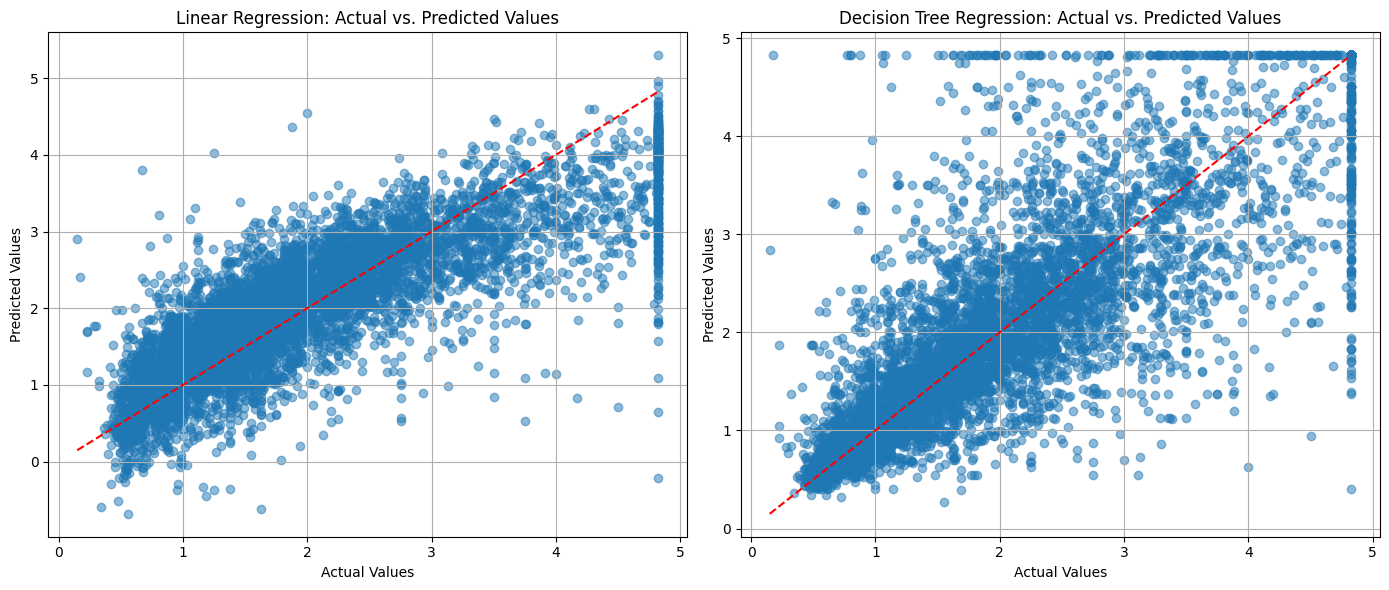

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# --- Evaluate Linear Regression Model ---
print("\n--- Linear Regression Model Evaluation ---")
y_pred_linear_reg = linear_reg_model.predict(X_test_housing)

linear_reg_mse = mean_squared_error(y_test_housing, y_pred_linear_reg)
linear_reg_r2 = r2_score(y_test_housing, y_pred_linear_reg)

print(f"Linear Regression MSE: {linear_reg_mse:.4f}")
print(f"Linear Regression R2 Score: {linear_reg_r2:.4f}")

# --- Evaluate Decision Tree Regression Model ---
print("\n--- Decision Tree Regression Model Evaluation ---")
y_pred_dt_reg = dt_reg_model.predict(X_test_housing)

dt_reg_mse = mean_squared_error(y_test_housing, y_pred_dt_reg)
dt_reg_r2 = r2_score(y_test_housing, y_pred_dt_reg)

print(f"Decision Tree Regression MSE: {dt_reg_mse:.4f}")
print(f"Decision Tree Regression R2 Score: {dt_reg_r2:.4f}")

# --- Visualize Results ---

plt.figure(figsize=(14, 6))

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test_housing, y_pred_linear_reg, alpha=0.5)
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'r--')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Scatter plot for Decision Tree Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test_housing, y_pred_dt_reg, alpha=0.5)
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'r--')
plt.title('Decision Tree Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the findings from the housing price prediction task, highlighting the performance of each model and key insights gained.


## Summary:

### Q&A
*   **What was the performance of the trained classification models on the Iris dataset?**
    All three classification models (Logistic Regression, Random Forest Classifier, and Support Vector Machine (SVM)) achieved a perfect accuracy of 1.0000 (100%) on the Iris dataset's test set. Their confusion matrices indicated perfect classification without any misclassifications.
*   **Which model(s) performed best?**
    Due to their identical and perfect accuracy, all three models—Logistic Regression, Random Forest, and SVM—are considered equally best-performing for the Iris dataset in this evaluation.
*   **What are the key insights from the evaluation?**
    The Iris dataset is relatively easy to classify for these common machine learning algorithms due to distinct class separation (especially for *setosa*) and generally well-separated features for *versicolor* and *virginica*. This demonstrates the basic application and evaluation of these classification algorithms on a classic dataset, but such perfect scores are not typical for more complex or noisy real-world datasets.

### Data Analysis Key Findings
*   **Iris Classification Performance:**
    *   Logistic Regression achieved an accuracy of 1.0000.
    *   Random Forest Classifier achieved an accuracy of 1.0000.
    *   Support Vector Machine (SVM) achieved an accuracy of 1.0000.
    *   All models demonstrated perfect classification on the Iris dataset.
*   **California Housing Dataset Preparation:**
    *   The housing dataset was loaded with 20,640 entries and 9 columns, including the target variable `MedHouseVal`.
    *   No missing values were found in the dataset.
    *   Outliers in numerical features were identified and capped using the Interquartile Range (IQR) method.
    *   Numerical features (excluding the target) were scaled using `StandardScaler`, resulting in features with a mean of approximately 0 and a standard deviation of approximately 1.
    *   No categorical columns were present, so one-hot encoding was not required.
*   **California Housing Regression Model Performance:**
    *   **Linear Regression Model:** Achieved a Mean Squared Error (MSE) of 0.4269 and an R-squared (R²) score of 0.6628.
    *   **Decision Tree Regression Model:** Achieved an MSE of 0.5325 and an R² score of 0.5794.
    *   The Linear Regression model performed better than the Decision Tree Regression model, exhibiting a lower MSE and a higher R² score, indicating better predictive accuracy for housing prices in this context.

### Insights or Next Steps
*   For the Iris dataset, while perfect accuracy is a good outcome, it highlights the dataset's simplicity rather than the superiority of one model over another among the ones tested.
*   For the housing price prediction, the Linear Regression model appears to be a more suitable choice than the Decision Tree Regressor given its superior performance metrics (lower MSE, higher R²). Further improvements could involve exploring advanced regression models (e.g., Gradient Boosting, Random Forest Regressor), hyperparameter tuning, or feature engineering to potentially enhance predictive accuracy.
